# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
#Type your code here
df = pd.read_csv('Dataset_klasifikasi.csv')
df.head()

,TransactionAmount,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Debit,Cluster_KMeans
0,0.007207,59,833,611,631,0.244828,0.0,0.336832,True,1
1,0.195940,63,833,611,631,0.451724,0.0,0.918055,True,1
2,0.065680,61,811,475,657,0.158621,0.0,0.068637,True,1
3,0.096016,59,811,1426,657,0.051724,0.0,0.569198,True,0
4,0.006874,61,811,1426,657,0.648276,0.0,0.492591,False,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TransactionAmount      2512 non-null   float64
 1   Location               2512 non-null   int64  
 2   Channel                2512 non-null   int64  
 3   CustomerAge            2512 non-null   int64  
 4   CustomerOccupation     2512 non-null   int64  
 5   TransactionDuration    2512 non-null   float64
 6   LoginAttempts          2512 non-null   float64
 7   AccountBalance         2512 non-null   float64
 8   TransactionType_Debit  2512 non-null   bool   
 9   Cluster_KMeans         2512 non-null   int64  
dtypes: bool(1), float64(4), int64(5)
memory usage: 179.2 KB


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
#Type your code here
X = df.drop('Cluster_KMeans', axis=1)
y = df['Cluster_KMeans']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [5]:
# Dictionary untuk model
models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}

# Dictionary untuk menyimpan model yang telah dilatih
trained_models = {}

# Training semua model
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model

print("Semua model telah selesai dilatih.")

Semua model telah selesai dilatih.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

KNN: Train Acc = 1.0000, Test Acc = 1.0000, Precision = 1.0000, Recall = 1.0000, F1-Score = 1.0000


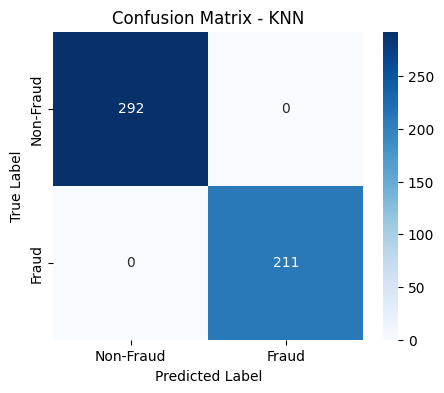

Decision Tree: Train Acc = 1.0000, Test Acc = 1.0000, Precision = 1.0000, Recall = 1.0000, F1-Score = 1.0000


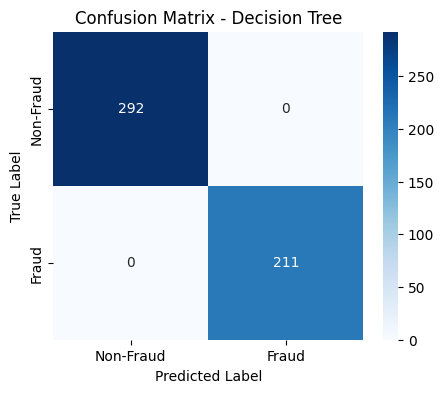

Random Forest: Train Acc = 1.0000, Test Acc = 1.0000, Precision = 1.0000, Recall = 1.0000, F1-Score = 1.0000


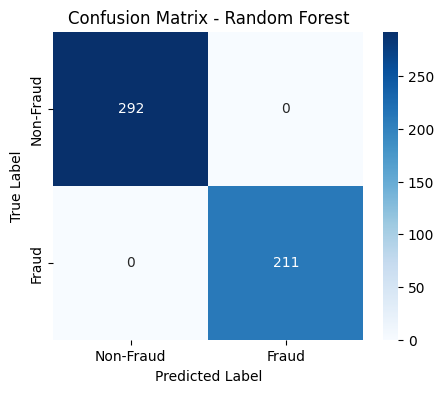

SVM: Train Acc = 1.0000, Test Acc = 1.0000, Precision = 1.0000, Recall = 1.0000, F1-Score = 1.0000


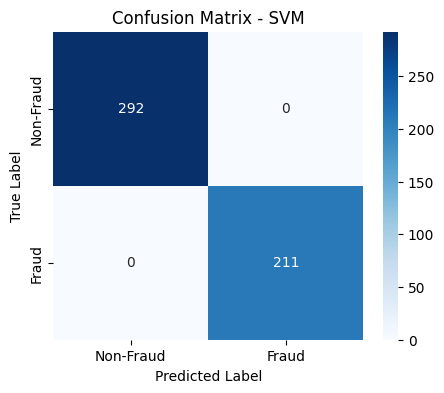

Naive Bayes: Train Acc = 1.0000, Test Acc = 1.0000, Precision = 1.0000, Recall = 1.0000, F1-Score = 1.0000


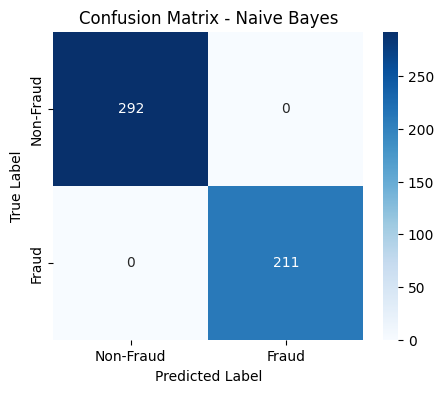


Model Performance:
KNN: Train Acc = 1.0000, Test Acc = 1.0000, Precision = 1.0000, Recall = 1.0000, F1-Score = 1.0000
Decision Tree: Train Acc = 1.0000, Test Acc = 1.0000, Precision = 1.0000, Recall = 1.0000, F1-Score = 1.0000
Random Forest: Train Acc = 1.0000, Test Acc = 1.0000, Precision = 1.0000, Recall = 1.0000, F1-Score = 1.0000
SVM: Train Acc = 1.0000, Test Acc = 1.0000, Precision = 1.0000, Recall = 1.0000, F1-Score = 1.0000
Naive Bayes: Train Acc = 1.0000, Test Acc = 1.0000, Precision = 1.0000, Recall = 1.0000, F1-Score = 1.0000


In [6]:
# Evaluasi model
results = {}

for name, model in trained_models.items():
    # Prediksi pada data training dan testing
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Menghitung metrik evaluasi
    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    # Menyimpan hasil evaluasi
    results[name] = {
        "Train Accuracy": acc_train,
        "Test Accuracy": acc_test,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

    # Menampilkan hasil evaluasi
    print(f"{name}: Train Acc = {acc_train:.4f}, Test Acc = {acc_test:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}, F1-Score = {f1:.4f}")

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# Menampilkan ringkasan hasil semua model
print("\nModel Performance:")
for name, scores in results.items():
    print(f"{name}: Train Acc = {scores['Train Accuracy']:.4f}, Test Acc = {scores['Test Accuracy']:.4f}, "
          f"Precision = {scores['Precision']:.4f}, Recall = {scores['Recall']:.4f}, F1-Score = {scores['F1-Score']:.4f}")

## **c. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Evaluasi pada masing - masing algoritma yang dipilih menghasilkan hasil yang sama.  

**Kenapa bisa terjadi akurasi yang sempurna dan semua hasil algoritma sama?**   

Karena pada clustering sebelumnya kita mencoba memisahkan data tersebut menjadi 2 untuk fraud dan non-fraud, hasil score silhoutte sebesar 0.9322 yang menunjukkan pemisahan cluster terpisah hampir sempurna. Ini yang menyebabkan hasil klasifikasi kita mencapai akurasi 100%.